# modeling spiral tips on a square domain as a gas of N brownian particles constrained  t

Let $\mathbf{x}\in D\subseteq\mathbb{R}^{Nd}$ be the initial configuration of $N$ particles in $d$ spatial dimensions sampled from the interior of an open Borel set embedded in $\mathbb{R}^{Nd}$.  Provided a patch/Boral set $\Sigma\subseteq \partial D$ of the surface of $D$ that is sufficiently small, the probability that a configuration starting at $\mathbf{x}$ at time $t_0=0$ leaves $D$ via the surface $\Sigma$ sometime after $t>0$ takes the value (`Arovas, Eqn. 6.17`):
$$
G_\Sigma(\mathbf{x},t)=-\int_t^\infty dt'\int_\Sigma dS' \hat{\mathbf{n}}'\cdot\mathbf{J}(\mathbf{x}',t'|\mathbf{x},0)\;,
$$

Where $\mathbf{J}(\mathbf{x}',t'|\mathbf{x},0)$ is the probability current satisfying 

$$
\mathcal{L}\mathbf{J}(\mathbf{x}',t'|\mathbf{x},0)=\partial_t\mathbf{J}(\mathbf{x}',t'|\mathbf{x},0)
$$
For some $\mathcal{L}$ of the form
$$
\mathcal{L} = A_i(\mathbf{x})\partial_{x_i}+\frac{1}{2}B_{ij}(\mathbf{x})\partial^2_{x_i,x_j}.
$$
- TODO: check for nontrivial relation to Fokker-Planck (Hint: try Arovas ctrl+f)




__Generalized Mean First Passage Times__ (Arovas, pg. 180)
The mean exit time from a region $\Omega$ via a boundary surface $\Sigma$, starting from some point $\mathbf{x}\in\Omega$, is

$$
T_\Sigma(\mathbf{x})=\int_0^\infty dt\,t\Big(-\frac{G_\Sigma(\mathbf{x},t)}{dt}\Big)\,.
$$
This function satisfies $\mathcal{L}T^{(n)}_\Sigma(\mathbf{x})=-1$, subject to the boundary condition $T^{(n)}_\Sigma(\mathbf{x})=0$ for all $\mathbf{x}\in\Sigma$.  

>It can be shown that higher moments of this general first passage time is achieved by the recursive relation, $\mathcal{L}T^{(n)}_\Sigma(\mathbf{x})=-nT^{(n-1)}_\Sigma(\mathbf{x})$.



__Mean First Passage Times of Radial Diffusion__
Consider one Brownian particle in $d$ spatial dimensions starting at radius $r$.  The mean exit time of this particle to pass through a sphere of radius $b>r$ is given, by isotropy, and can be shown to satisfy (`Arovas 6.34`)

$$
\partial_{r,r}^2T_b(r)+\frac{d-1}{r}\partial_rT_b(r)=-\frac{1}{D}\,.
$$

Imposing the bounddary condition $T_b(b)=0$ results in 

$$
T_b(r)=\frac{b^2-r^2}{2dD}\,.
$$

Can this be immediately applied to estimate the average time for two Brownian particles to collide at a an effective interaction distance of $b$?  In which case, the stopping time is $T<T_b(0)=\frac{b^2}{2dD}=\frac{b^2}{4D}$.




In [1]:
from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting as get_one_step
from lib.model.LR_model import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.measure.utils_measure_tips_cpu import *
from lib.viewer import *
import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# (ignore, dormand-prince is just not working...): Detecting some spiral tips generated by the model following Luo and Rudy using a composite numerical method following dormand and prince (1990)

In [27]:
dt=0.001
dt, arr39, one_step = get_one_step(nb_dir,dt=dt)

# np.stack(*(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)).T

In [28]:
#initialize simulation
t=0.
tf=100.
num_steps=int(tf/dt)
count=0.
input_file_name=f"{nb_dir}/Data/test_data/test_txt.npz"
txt=load_buffer_LR(input_file_name, Ca_i_initial = 2*10**-4, Vmax = 45., Vmin = -75.)
inVc=txt[...,(0,-1)].copy()
inmhjdfx=txt[...,1:-1].copy()
outVc=inVc.copy()
dVcdt=inVc.copy()
outmhjdfx=inmhjdfx.copy()

In [29]:
txt_nxt=one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)

#compute all spiral tips present
V_threshold=0.#-37.#mV
level1=V_threshold
theta_threshold=0.
level2=0.
img=outVc[...,0]
dimgdt=dVcdt[...,0]
width=200;height=200
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2,width=width,height=height)
dict_out_instantaneous=dict_out
print(f"{dict_out['n']} tips are present.")
# lst_values_theta

20 tips are present.


In [34]:
from lib.controller.one_step_explicit_dormand_prince import *
dt=0.001#0.001 appeared to work
one_step_explicit_dormand_prince_method=get_one_step_explicit_dormand_prince_method(dt,nb_dir)

In [35]:
#TODO: determine if I should reallly implement dormand prince if it's already stable at dt=0.1 for t>100
#TODO: stack txt
#TODO: make comp_flow_map that inputs txt, returns txt_nxt
#TODO: functionally compute each dt1,dt2,dt3,... needed for dormand prince for a given dt
# initialize ^those lookup tables in a def get_... function
# TODO: make a one_step method for each dti
# TODO: implement my dormand-prince method for the Luo-Rudy model.
# txt=np.zstack((inVc, outVc, inmhjdfx, outmhjdfx, dVcdt))
# txt_nxt=txt.copy()
# one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)

#initialize simulation
t=0.
tf=100.
num_steps=int(tf/dt)
count=0.
input_file_name=f"{nb_dir}/Data/test_data/test_txt.npz"
txt=load_buffer_LR(input_file_name, Ca_i_initial = 2*10**-4, Vmax = 45., Vmin = -75.)
inVc=txt[...,(0,-1)].copy()
inmhjdfx=txt[...,1:-1].copy()
outVc=inVc.copy()
dVcdt=inVc.copy()
outmhjdfx=inmhjdfx.copy()


In [36]:
x_out,v_out,x_err,v_err=one_step_explicit_dormand_prince_method(t,inVc,inmhjdfx)
outVc,outmhjdfx=x_out,v_out
outVc.shape

(200, 200, 2)

In [43]:
_,comp_flow_map=get_comp_flow_map(nb_dir,dt=0.,width=200,height=200,ds=5.,diffCoef=0.001,Cm=1.)


In [46]:
# #update texture namespace
inVc,inmhjdfx=x_err,v_err
dVcdt,dmhjdfx_dt=comp_flow_map(t,inVc,inmhjdfx)

10 tips are present at time t=0.


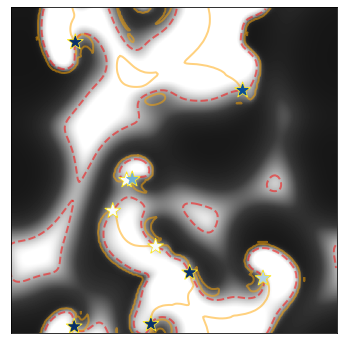

In [47]:


#compute all spiral tips present
V_threshold=0.#mV
level1=V_threshold
# theta_threshold=0.
level2=0.

# #update texture namespace
# inVc=x_err.copy()
# dVcdt=v_err.copy()
# # inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
# txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

img=inVc[...,0]
dimgdt=dVcdt[...,0]
width=200;height=200
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2,width=width,height=height)
dict_out_instantaneous=dict_out

x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['v'])
n_tips=dict_out['n']
print(f"{n_tips} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
plt.show(fig)

In [48]:
# h=0.1
# #precompute anything that needs precomputing
# dt=h/100.
tmax=2.
#get one_step method
dt, one_step_map = get_one_step_map(nb_dir,dt)
# txt=one_step_map(txt)
num_steps=int((tmax-t)/dt)
step_count=0
while t<2.:
    #forward integrate to tmax
    x_out,v_out,x_err,v_err=one_step_explicit_dormand_prince_method(t,inVc,inmhjdfx)
    # #update texture namespace
    inVc,inmhjdfx=x_err,v_err
    #update time
    t+=dt
    step_count+=1
    printProgressBar(step_count,num_steps)
#     if n_tips==0:
#         print(f"zero tips remaining at time t={t}!")
#         break
beep(1)
print(dt)

0.001█████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


In [49]:
# #update texture namespace
inVc,inmhjdfx=x_err,v_err
dVcdt,dmhjdfx_dt=comp_flow_map(t,inVc,inmhjdfx)

0 tips are present at time t=2.


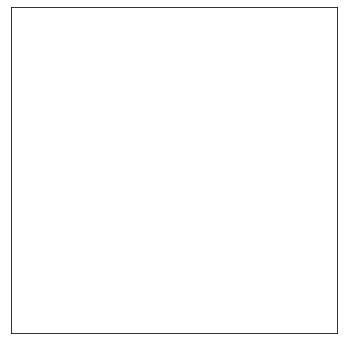

In [50]:
#compute all spiral tips present
V_threshold=0.#mV
level1=V_threshold
# theta_threshold=0.
level2=0.

img=inVc[...,0]
dimgdt=dVcdt[...,0]
width=200;height=200
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2,width=width,height=height)
dict_out_instantaneous=dict_out

x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['v'])
n_tips=dict_out['n']
print(f"{n_tips} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
plt.show(fig)

In [51]:
img

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [25]:
#TODO:  #Hint: use the functions from model.model_LR
# def get_comp_flow_map(nb_dir,dt):
#     dt, arr39, one_step = get_one_step_explicit_synchronous_splitting(nb_dir,dt)
#     comp_exact_next_gating_var(inCgate,outCgate,arr_interp)

#     @njit
#     def comp_flow_map(txt):
#         #unstack txt
#         inVc,outVc,inmhjdfx,outmhjdfx,dVcdt = unstack_txt(txt)
#         #integrate by dt
#         one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)



#         dVcdt_val=comp_dVcdt(inVc,x,y,inCgate,IK1T,x1)
#         # t+=dt
#         #stack txt
#         txt_nxt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
#         return txt_nxt
#     return dt, comp_flow_map

# test the tip generation routine for the Luo Rudy model

In [1]:
#search_for_file
# input_file_name=search_for_file()
input_file_name="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-1/ic-in/ic_200x200.101.13.npz"

In [2]:
#generate_tip_logs_from_ic using the model following Luo and Rudy
from lib.routines.kwargs_LR_model_cy import get_kwargs
from lib.routines.generate_tip_logs_LR_model_cy import generate_tip_logs_from_ic
def run_routine(ic):
    kwargs = get_kwargs(ic)
    kwargs = generate_tip_logs_from_ic(ic, **kwargs)
    kwargs['tmin_early_stopping']=5.
    kwargs['tmin_early_stopping']=50.
    kwargs['save_every_n_frames']=1000
    kwargs['h']=0.01
    print(f"completed birth_death_rates_from_ic: {ic}")
    print(f"csv of spiral tip data stored in: {kwargs['completed_ic_dir']}")
    return kwargs#True

In [55]:
retval=run_routine(input_file_name)
retval.head()
# yielded error after 3 hours
# "IndexError: index -1 is out of bounds for axis 0 with size 0"
#^this means no tips were detected.

IndexError: index -1 is out of bounds for axis 0 with size 0